In [3]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline
path = 'C:/Users/aliha/Desktop/Third/Computer Vision/Project4/DL/cropped/'

In [4]:
from keras.preprocessing.image import ImageDataGenerator


ModuleNotFoundError: No module named 'keras'

In [5]:
# width,height,channels
image_shape = (80,80,3)
batch_size = 20

In [6]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.3, # Shift the pic width by a max of 10%
                               height_shift_range=0.2, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

NameError: name 'ImageDataGenerator' is not defined

In [7]:
train_image_gen = image_gen.flow_from_directory(path+'train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')
test_image_gen = image_gen.flow_from_directory(path+'test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

NameError: name 'image_gen' is not defined

In [8]:
len(train_image_gen)

NameError: name 'train_image_gen' is not defined

# Creating the Model

In [9]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

ModuleNotFoundError: No module named 'keras'

In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(512))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

model.add(Dense(14))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [11]:
model.summary()

NameError: name 'model' is not defined

### Training the Model

In [12]:
batch_size = 20
train_image_gen = image_gen.flow_from_directory('./cropped/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

NameError: name 'image_gen' is not defined

In [115]:
test_image_gen = image_gen.flow_from_directory('./cropped/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 121 images belonging to 1 classes.


In [116]:
train_image_gen.class_indices

{'Akhmedov Sanzhar': 0,
 'Alikhan Zhamankhan': 1,
 'Baibatchayeva Anar': 2,
 'Dalabay Abylay': 3,
 'Daniyar Raiymbekov': 4,
 'Duisenov Alikhan': 5,
 'Kenzhebay Askar': 6,
 'Kyran Yerkin': 7,
 'Maxat Ualikhan': 8,
 'Naryshov Ernar': 9,
 'Rysmambetov Nurtugan': 10,
 'Sagynbek Nurbolat': 11,
 'Zhetessov Nur': 12,
 'Zhumabekov Magjan': 13}

In [117]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=23,
                              validation_data=test_image_gen,
                             validation_steps=6)

Epoch 1/100
23/23 [==============================] - 6s 270ms/step - loss: 0.6223 - accuracy: 0.7919 - val_loss: 102.7175 - val_accuracy: 0.0667
Epoch 2/100
23/23 [==============================] - 6s 261ms/step - loss: 0.8591 - accuracy: 0.7081 - val_loss: 105.0870 - val_accuracy: 0.0833
Epoch 3/100
23/23 [==============================] - 6s 263ms/step - loss: 0.7820 - accuracy: 0.7624 - val_loss: 100.7290 - val_accuracy: 0.1167
Epoch 4/100
23/23 [==============================] - 6s 260ms/step - loss: 0.5599 - accuracy: 0.8167 - val_loss: 114.9023 - val_accuracy: 0.0833
Epoch 5/100
23/23 [==============================] - 6s 258ms/step - loss: 0.6965 - accuracy: 0.7805 - val_loss: 112.2549 - val_accuracy: 0.0500
Epoch 6/100
23/23 [==============================] - 6s 263ms/step - loss: 0.6404 - accuracy: 0.7919 - val_loss: 117.5537 - val_accuracy: 0.0417
Epoch 7/100
23/23 [==============================] - 6s 267ms/step - loss: 0.5522 - accuracy: 0.8077 - val_loss: 114.3258 - val_ac

In [99]:
#20 - 73%
#50 - 80%

In [104]:
# model.save('50epoch.h5')

# Evaluating the Model

In [101]:
# results.history['accuracy']

[0.7285974621772766,
 0.7030965685844421,
 0.7176684737205505,
 0.7285974621772766,
 0.750455379486084,
 0.7085610032081604,
 0.7194899916648865,
 0.748633861541748,
 0.7723132967948914,
 0.7517856955528259,
 0.7413479089736938,
 0.7285974621772766,
 0.744990885257721,
 0.7304189205169678,
 0.748633861541748,
 0.7832422852516174,
 0.7978141903877258,
 0.7413479089736938,
 0.7632058262825012,
 0.7231329679489136,
 0.7795992493629456,
 0.7522768378257751,
 0.7795992493629456,
 0.7395263910293579,
 0.7759562730789185,
 0.7540983557701111,
 0.7595628499984741,
 0.7850637435913086,
 0.7832422852516174,
 0.8160291314125061,
 0.7905282378196716,
 0.7704917788505554,
 0.7668488025665283,
 0.7868852615356445,
 0.7923497557640076,
 0.7723132967948914,
 0.7650273442268372,
 0.7850637435913086,
 0.7959927320480347,
 0.7941712141036987,
 0.8051002025604248,
 0.7723132967948914,
 0.7832422852516174,
 0.806921660900116,
 0.7868852615356445,
 0.7923497557640076,
 0.7595628499984741,
 0.801457166671752

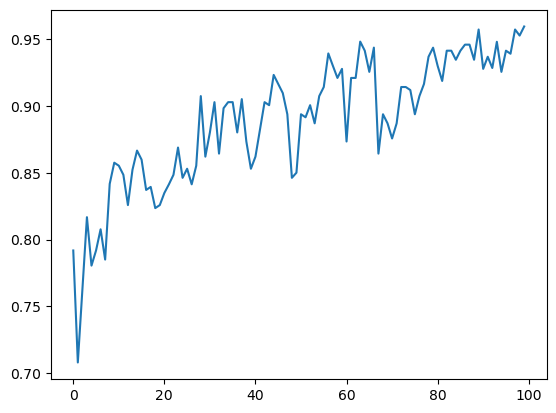

In [120]:
plt.plot(results.history['accuracy'])

In [121]:
# model.save('cat_dog_100epochs.h5')

# Predicting on new images

In [122]:
names = list(train_image_gen.class_indices.keys())

In [123]:
names

['Akhmedov Sanzhar',
 'Alikhan Zhamankhan',
 'Baibatchayeva Anar',
 'Dalabay Abylay',
 'Daniyar Raiymbekov',
 'Duisenov Alikhan',
 'Kenzhebay Askar',
 'Kyran Yerkin',
 'Maxat Ualikhan',
 'Naryshov Ernar',
 'Rysmambetov Nurtugan',
 'Sagynbek Nurbolat',
 'Zhetessov Nur',
 'Zhumabekov Magjan']

In [124]:
from keras.models import load_model


In [125]:
model = load_model('50epoch.h5')

In [126]:
import numpy as np
import keras.utils as image
ali_file = './photos/test/all/1.jpg'

ali_img = image.load_img(ali_file, target_size=(150, 150))

ali_img = image.img_to_array(ali_img)

ali_img = np.expand_dims(ali_img, axis=0)
ali_img = ali_img/255

In [131]:
prediction = model.predict(ali_img)
pred = np.argmax(prediction)
labels = (train_image_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels[pred]
# print(labels)
prediction[0][pred]


1/1 [==============================] - 0s 53ms/step


0.1729376

In [128]:
prediction

array([[0.06362019, 0.1729376 , 0.06362019, 0.06362019, 0.06362019,
        0.06362019, 0.06362019, 0.06362019, 0.06362019, 0.06362019,
        0.06362019, 0.06362019, 0.06362019, 0.06362019]], dtype=float32)

In [129]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
face_cascade = cv2.CascadeClassifier('C:/Users/aliha/Desktop/Third/Computer Vision/W3/DATA/haarcascades/haarcascade_frontalface_default.xml')


In [134]:

cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,  480))
while True:
    
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_rects = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,255,0), 2)
        roi_face = frame[y:y+h, x:x+w]
        roi_gray = gray[y:y+h, x:x+w]
        img = roi_face.copy()
        img = cv2.resize(img, (150, 150))
        img = image.img_to_array(img)

        img = np.expand_dims(img, axis=0)
        img = img/255
        predictions = model.predict(img)
        pred = np.argmax(predictions)
        name = labels[pred]
        accuracy = predictions[0][pred] * 100
        cv2.putText(frame, f"{name}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        
    cv2.imshow('Face Recognition', frame)
       
    
    k = cv2.waitKey(1)
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()
    

1/1 [==============================] - 0s 63ms/step


In [28]:
import cv2
import os
for name in names:
    
    source_folder = 'C:/Users/aliha/Desktop/Third/Computer Vision/Project4/DL/photo/'+name
    destination_folder = 'C:/Users/aliha/Desktop/Third/Computer Vision/Project4/DL/cropped/' + name
    try: 
        os.mkdir(destination_folder) 
    except OSError as error: 
        print(error)
        continue

    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    for filename in os.listdir(source_folder):
        if not filename.endswith('.jpg'):  # skip non-jpg files
            continue
        image_path = os.path.join(source_folder, filename)
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
        for (x, y, w, h) in faces:
            cropped = image[y+20:y+h-20, x+25 *(w > 25) :x+w-25*(w > 25)]
                
            crop_filename = f'{os.path.splitext(filename)[0]}_{x}_{y}.jpg'
            crop_path = os.path.join(destination_folder, crop_filename)
            cv2.imwrite(crop_path, cropped)


[WinError 183] Невозможно создать файл, так как он уже существует: 'C:/Users/aliha/Desktop/Third/Computer Vision/Project4/DL/cropped/Akhmedov Sanzhar'
[WinError 183] Невозможно создать файл, так как он уже существует: 'C:/Users/aliha/Desktop/Third/Computer Vision/Project4/DL/cropped/Alikhan Zhamankhan'
[WinError 183] Невозможно создать файл, так как он уже существует: 'C:/Users/aliha/Desktop/Third/Computer Vision/Project4/DL/cropped/Baibatchayeva Anar'
[WinError 183] Невозможно создать файл, так как он уже существует: 'C:/Users/aliha/Desktop/Third/Computer Vision/Project4/DL/cropped/Dalabay Abylay'
[WinError 183] Невозможно создать файл, так как он уже существует: 'C:/Users/aliha/Desktop/Third/Computer Vision/Project4/DL/cropped/Daniyar Raiymbekov'
[WinError 183] Невозможно создать файл, так как он уже существует: 'C:/Users/aliha/Desktop/Third/Computer Vision/Project4/DL/cropped/Duisenov Alikhan'
[WinError 183] Невозможно создать файл, так как он уже существует: 'C:/Users/aliha/Desktop

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'
